In [220]:
import math
import matplotlib.pyplot as plt
import random

In [259]:


# A class for LIF , NLIF and ALIF Model.

class LIF:
    
    
    # this function will initialize model.
    
    def __init__(self , dt = 0.1 , uRest=-70,uReset = -65, R=10, tau=8, treshold=-45, uSpike = 5 , duration=100 , uStart = -80 ,
        isNLIF = False , thetaRH = -55 , dtSharpness = 0.8 ,
        isALIF = False , tauK = 1  , currentModel = 1 , aValue = 0.02 , bValue = 0.4 ,
        numOfTest = 500 , maxCurrent = 5  , freqCount = 1 ,
                neuronMode = 0):
        
        self.dt = dt
        self.uRest = uRest
        self.uReset = uReset
        self.R = R
        self.tau = tau
        self.tauK = tauK
        self.treshold = treshold
        self.duration = duration
        self.uSpike = uSpike
        self.uStart = uStart
        self.spike = []
        self.time = []
        self.current = []
        self.u = []
        self.w = []
        self.wTemp = 0
        self.thetaRH = thetaRH
        self.exponentialValue = 0
        self.adaptiveValue = 0
        self.isNLIF = isNLIF
        self.isALIF = isALIF
        self.dtSharpness = dtSharpness
        self.fireCount = 0
        self.currentModel = currentModel
        self.aValue = aValue
        self.bValue = bValue
        
        self.neuronMode = neuronMode
        
        self.numOfTest = numOfTest
        self.maxCurrent = maxCurrent
        self.freqCount = freqCount
        self.temp = self.uStart
        
        
        # initialize time array
        for i in range(0, int(duration/dt), 1):
            self.time.append(i * dt)
        self.u.append(uStart) 
        self.w.append(0)
   
        
    
        
    # this function will be used for making a list of currents
    def currentFunc(self):
            
           # fixed current
            if(self.currentModel == 1):
                for i in range(len(self.time)):
                    self.current.append(3.5)
            # linear current        
            elif (self.currentModel == 2):
                for i in range(len(self.time)):
                        self.current.append((i*self.dt/25)+0.5)
            # sin current 
            elif (self.currentModel == 3):
                for i in range(len(self.time)):
                    self.current.append(math.sin(i*self.dt/5)/2+3)
                    
            # power 2 current 
            elif (self.currentModel == 4):
                for i in range(len(self.time)):
                    #self.current.append((pow(i-100,2)+2)/2000)
                    self.current.append(math.cos(i*self.dt/5)/5+3.5)
            # random current between 1 and 6
            elif (self.currentModel == 5):
                for i in range(len(self.time)):
                    self.current.append(random.randrange(1, 6))
            # random current be
            elif (self.currentModel == 6):
                for i in range(len(self.time)):
                    if(i % 2 == 0):
                        self.current.append(0)
                    else:
                        self.current.append(5)
            elif (self.currentModel == 7):
                for i in range(len(self.time)):
                    self.current.append(4.5*math.cos(i*self.dt)+0.5*math.sin(i*self.dt))
                    
            # current for frequency
            if(self.currentModel == 8):
                for i in range(len(self.time)):
                    self.current.append(self.freqCount * self.maxCurrent / self.numOfTest)
        
    

  

    # potential function to find potential base on current 
    def potential(self):
            
          
                
            self.temp = self.uStart     #temp value for latest u
            for i in range(0, len(self.time)):
                self.exponentialValue = 0
                
                
                #if the model is exponential
                if (self.isNLIF == True):
                    self.exponentialValue =(self.dtSharpness * math.exp((self.temp - self.thetaRH)/self.dtSharpness))
                
                # if the model adaptive
                if (self.isALIF == True):
                    dw = ((((self.aValue*(self.temp-self.uRest))-self.wTemp) / self.tauK) + (self.bValue * self.fireCount))
                    self.wTemp = (dw * self.dt) + self.wTemp  #latar should be multiply by R
                    
                    
                    
                #start calculating du    
                du = ( (-1*(self.temp-self.uRest)) + (self.R * self.current[i]) + self.exponentialValue - (self.R * self.wTemp)) 
                du = (du* self.dt)/ self.tau
                self.temp = du + self.temp
                spike = False
                #if passes treshold
                if self.temp >= self.treshold:
                    spike = True
                    self.u.append(self.uSpike+self.temp)
                    self.u.append(self.uReset)
                    self.fireCount += 1
                    #i += 1
                
                    self.spike.append(self.time[i])
                    self.temp = self.uReset
                else:
                    self.u.append(self.temp) 
                    
                
                    
                self.w.append(self.wTemp)
                yield {'potential': self.temp, 'spike': spike}
                
                          
                     
                
                
    def uTimePlot(self):
        plt.plot(list(map(lambda i: i * self.dt, range(len(self.u)))), self.u,'blue')
        
        plt.xlabel("time")
        plt.ylabel("potential")
        if (self.isALIF == True):
            plt.figtext(1.2, 0.2, f"Total time frame: {self.duration} \n dt: {self.dt} \n Rm: {self.R} \n tau: {self.tau} \n treshold: {self.treshold} \n vRest: {self.uRest} \n Vreset:{self.uReset} \n Vspike: {self.uSpike} \n Vstart: {self.uStart} \n Vrh: {self.thetaRH} \n a: {self.aValue} \n b: {self.bValue} \n dtSharpness: {self.dtSharpness}", ha="right", fontsize=10)
        else:
            plt.figtext(1.2, 0.2, f"Total time frame: {self.duration} \n dt: {self.dt} \n Rm: {self.R} \n tau: {self.tau} \n treshold: {self.treshold} \n vRest: {self.uRest} \n Vreset:{self.uReset} \n Vspike: {self.uSpike} \n Vstart: {self.uStart} \n", ha="right", fontsize=12)
        plt.show()
        
    
        
        
    def wTimePlot(self):
        plt.plot(list(map(lambda i: i * self.dt, range(len(self.w)))), self.w,'cyan')
        plt.xlabel("time")
        plt.ylabel("adaptation current")
        plt.show()    
        

    
    def plotCurrent(self):
        plt.plot(list(map(lambda i: i * self.dt, range(len(self.current)))), self.current,'red')
        plt.xlabel("time")
        plt.ylabel("input current")
        plt.show()
        


In [260]:
class NeuronsGroup:

  def __init__(self, neurons, neuronRelations, wExcitatory=6, wInhibitory=-8 , NumOfIteration=1000 , spikeThreshholdNum = 10 ,wPopulatin = 4):
     
    
    
    self.neurons = neurons 
    self.neuronRelations = neuronRelations
    self.populationRelations = []
    self.wExcitatory = wExcitatory
    self.wInhibitory = wInhibitory
    self.NumOfIteration = NumOfIteration
    self.spikes = []
    
    self.excitatorySpikes = []
    self.inhibitorySpikes = []
    self.exctatorySpikesTime = []
    self.inhibitorySpikesTime = []
    
    self.delay = 1
    self.addValue = []
    self.nerounData = []
    
    self.isPopulationRelation = False
    self.numOfSpikes = 0
    self.spikeThreshholdNum = spikeThreshholdNum
    self.wPopulatin = wPopulatin
    
    for i in neurons:
      i.currentFunc()
      self.nerounData.append(i.potential())
    
  def groupPotential(self):
    lenght = len(self.neurons)
    self.addValue = [[0] * lenght for _ in range(self.NumOfIteration)]
    for time in range(self.NumOfIteration):
        self.numOfSpikes = 0
        for i in range(len(self.nerounData)):
            isSpike = next(self.nerounData[i])
            
            if isSpike['spike']:
                self.numOfSpikes += 1
                for j in self.neuronRelations[i]:
                    if self.neurons[i].neuronMode == 0: # it is Excitatory
              
                      self.exctatorySpikesTime.append(time)
                      self.excitatorySpikes.append(i + 1)
                      if time+self.delay < self.NumOfIteration:
                            self.addValue[time + self.delay][j] += self.wExcitatory

                    if self.neurons[i].neuronMode == 1:  # it is Inhibitory
              
                      self.inhibitorySpikesTime.append(time)
                      self.inhibitorySpikes.append(i + 1)
                      if time + self.delay < self.NumOfIteration:
                        self.addValue[time+self.delay][j] += self.wInhibitory
                
            if(self.isPopulationRelation):      
                if self.numOfSpikes >= self.spikeThreshholdNum:
                    for j in self.populationRelations:
                          for neuron in j.neurons:
                            neuron.temp += self.wPopulatin  
                
                
        for i in range(len(self.neurons)):
            self.neurons[i].temp += self.addValue[time][i]
      

    
  def RasterPlot(self):
    plt.scatter(self.exctatorySpikesTime, self.excitatorySpikes, c='blue', s=7)
    plt.scatter(self.inhibitorySpikesTime, self.inhibitorySpikes, c='green', s=7)
    plt.title('Spike raster plot')
    plt.xlabel("Spike")
    plt.ylabel("Neuron")
    plt.legend(['Excitatory', 'Inhibitory'])
    
    
  def returnExcitatoryData(self):
        return self.exctatorySpikesTime , self.excitatorySpikes
    
  def returnInhibitoryData(self):
        return self.inhibitorySpikesTime, self.inhibitorySpikes


  def PopulationRelation(self,neuronPopulation):
    self.isPopulationRelation = True
    self.populationRelations.append(neuronPopulation)
    
    
    
    
    

# part 1

# both are Excitatory

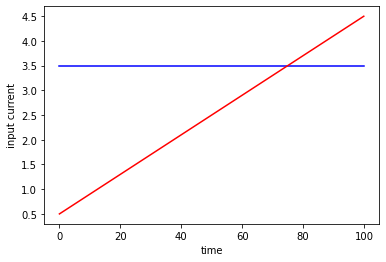

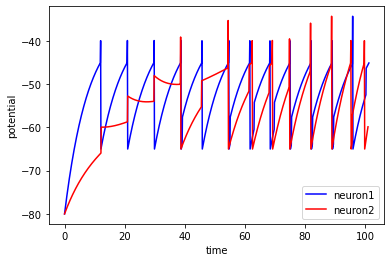

In [261]:
neuron1 = LIF(currentModel=1,dt=0.1 , duration = 100 , neuronMode = 0)
neuron2 = LIF(currentModel=2, dt = 0.1,duration = 100 , neuronMode = 0)


neurons = [neuron1, neuron2]
neuronRelations = [[1], [0]]
NeuronsG1 = NeuronsGroup(neurons=neurons, neuronRelations=neuronRelations)
NeuronsG1.groupPotential()


#plot Current
plt.plot(list(map(lambda i: i * neuron1.dt, range(len(neuron1.current)))), neuron1.current,'blue')
plt.plot(list(map(lambda i: i * neuron2.dt, range(len(neuron2.current)))), neuron2.current,'red')
plt.xlabel("time")
plt.ylabel("input current")
plt.show()

# plot potential
plt.xlabel("time")
plt.ylabel("potential")
plt.plot(list(map(lambda i: i * neuron1.dt, range(len(neuron1.u)))), neuron1.u,'blue')
plt.plot(list(map(lambda i: i * neuron2.dt, range(len(neuron2.u)))), neuron2.u,'red')
plt.legend(['neuron1', 'neuron2'])
plt.show()



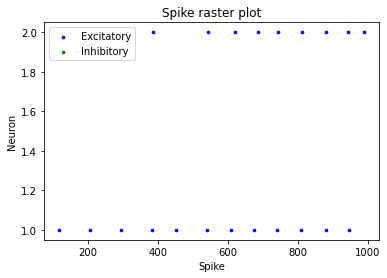

In [262]:
NeuronsG1.RasterPlot()

another example

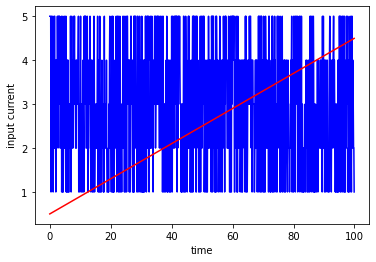

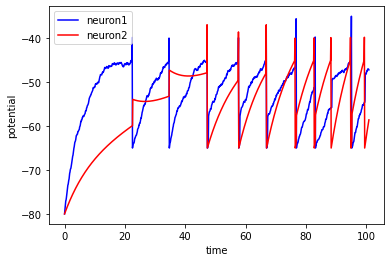

In [263]:
neuron01 = LIF(currentModel=5,dt=0.1 , duration = 100 , neuronMode = 0)
neuron02 = LIF(currentModel=2, dt = 0.1,duration = 100 , neuronMode = 0)
neurons = [neuron01, neuron02]
neuronRelations = [[1], [0]]
NeuronsG22 = NeuronsGroup(neurons=neurons, neuronRelations=neuronRelations)
NeuronsG22.groupPotential()


#plot Current
plt.plot(list(map(lambda i: i * neuron01.dt, range(len(neuron01.current)))), neuron01.current,'blue')
plt.plot(list(map(lambda i: i * neuron02.dt, range(len(neuron02.current)))), neuron02.current,'red')
plt.xlabel("time")
plt.ylabel("input current")
plt.show()

# plot potential
plt.xlabel("time")
plt.ylabel("potential")
plt.plot(list(map(lambda i: i * neuron01.dt, range(len(neuron01.u)))), neuron01.u,'blue')
plt.plot(list(map(lambda i: i * neuron02.dt, range(len(neuron02.u)))), neuron02.u,'red')
plt.legend(['neuron1', 'neuron2'])
plt.show()

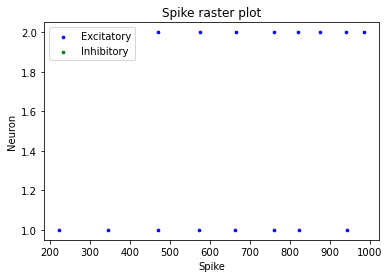

In [264]:
NeuronsG22.RasterPlot()

# both are Inhibitory

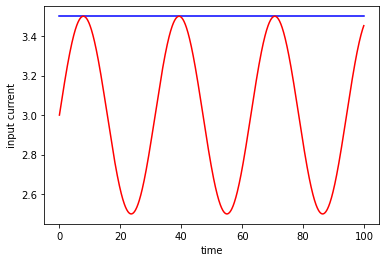

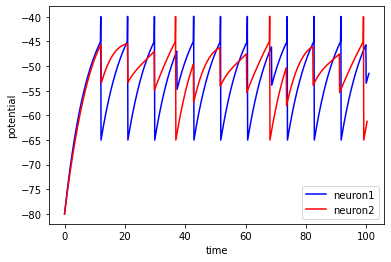

In [265]:
neuron3 = LIF(currentModel=1,dt=0.1 , duration = 100 , neuronMode = 1)
neuron4 = LIF(currentModel=3, dt = 0.1,duration = 100 , neuronMode = 1)


neurons = [neuron3, neuron4]
neuronRelations = [[1], [0]]
NeuronsG2 = NeuronsGroup(neurons=neurons, neuronRelations=neuronRelations)
NeuronsG2.groupPotential()

#plot Current
plt.plot(list(map(lambda i: i * neuron3.dt, range(len(neuron3.current)))), neuron3.current,'blue')
plt.plot(list(map(lambda i: i * neuron4.dt, range(len(neuron4.current)))), neuron4.current,'red')
plt.xlabel("time")
plt.ylabel("input current")
plt.show()

# plot potential
plt.xlabel("time")
plt.ylabel("potential")
plt.plot(list(map(lambda i: i * neuron3.dt, range(len(neuron3.u)))), neuron3.u,'blue')
plt.plot(list(map(lambda i: i * neuron4.dt, range(len(neuron4.u)))), neuron4.u,'red')
plt.legend(['neuron1', 'neuron2'])
plt.show()


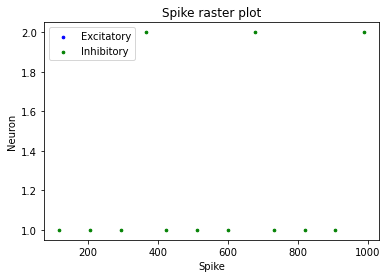

In [266]:
NeuronsG2.RasterPlot()

another example

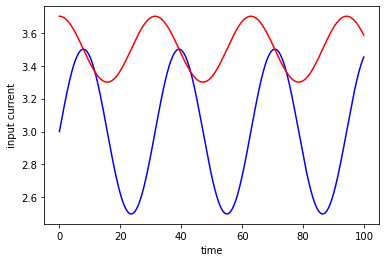

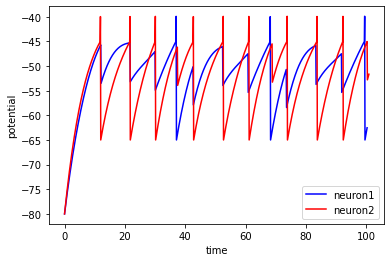

In [271]:
neuron03 = LIF(currentModel=3,dt=0.1 , duration = 100 , neuronMode = 1)
neuron04 = LIF(currentModel=4, dt = 0.1,duration = 100 , neuronMode = 1)


neurons = [neuron03, neuron04]
neuronRelations = [[1], [0]]
NeuronsG12 = NeuronsGroup(neurons=neurons, neuronRelations=neuronRelations)
NeuronsG12.groupPotential()

#plot Current
plt.plot(list(map(lambda i: i * neuron03.dt, range(len(neuron03.current)))), neuron03.current,'blue')
plt.plot(list(map(lambda i: i * neuron04.dt, range(len(neuron04.current)))), neuron04.current,'red')
plt.xlabel("time")
plt.ylabel("input current")
plt.show()

# plot potential
plt.xlabel("time")
plt.ylabel("potential")
plt.plot(list(map(lambda i: i * neuron03.dt, range(len(neuron03.u)))), neuron03.u,'blue')
plt.plot(list(map(lambda i: i * neuron04.dt, range(len(neuron04.u)))), neuron04.u,'red')
plt.legend(['neuron1', 'neuron2'])
plt.show()


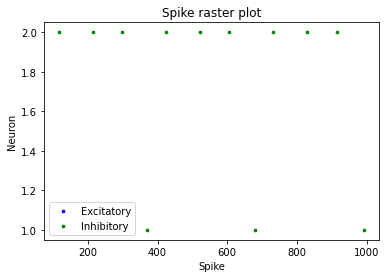

In [272]:
NeuronsG12.RasterPlot()

# one Excitatory and one Inhibitory

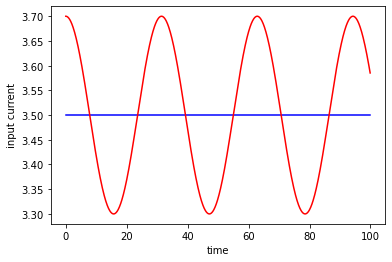

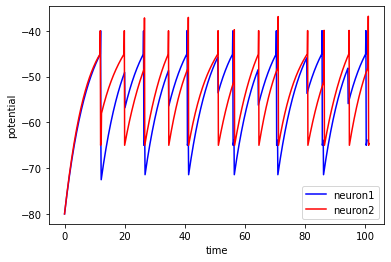

In [273]:
neuron5 = LIF(currentModel=1,dt=0.1 , duration = 100 , neuronMode = 0)
neuron6 = LIF(currentModel=4, dt = 0.1,duration = 100 , neuronMode = 1)


neurons = [neuron5, neuron6]
neuronRelations = [[1], [0]]
NeuronsG3 = NeuronsGroup(neurons=neurons, neuronRelations=neuronRelations)
NeuronsG3.groupPotential()

#plot Current
plt.plot(list(map(lambda i: i * neuron5.dt, range(len(neuron5.current)))), neuron5.current,'blue')
plt.plot(list(map(lambda i: i * neuron6.dt, range(len(neuron6.current)))), neuron6.current,'red')
plt.xlabel("time")
plt.ylabel("input current")
plt.show()

# plot potential
plt.xlabel("time")
plt.ylabel("potential")
plt.plot(list(map(lambda i: i * neuron5.dt, range(len(neuron5.u)))), neuron5.u,'blue')
plt.plot(list(map(lambda i: i * neuron6.dt, range(len(neuron6.u)))), neuron6.u,'red')
plt.legend(['neuron1', 'neuron2'])
plt.show()


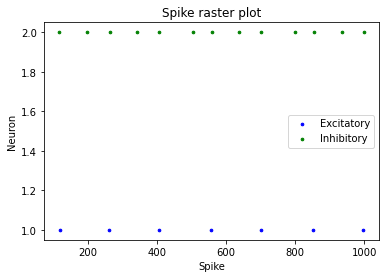

In [274]:
NeuronsG3.RasterPlot()

reverse neuron mode

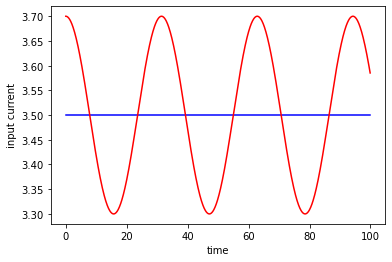

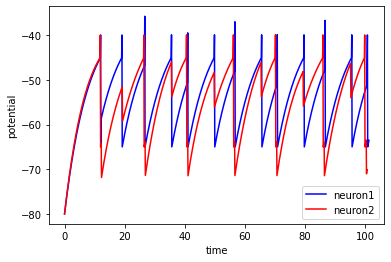

In [275]:
neuron7 = LIF(currentModel=1,dt=0.1 , duration = 100 , neuronMode = 1)
neuron8 = LIF(currentModel=4, dt = 0.1,duration = 100 , neuronMode = 0)


neurons = [neuron7, neuron8]
neuronRelations = [[1], [0]]
NeuronsG4 = NeuronsGroup(neurons=neurons, neuronRelations=neuronRelations)
NeuronsG4.groupPotential()

#plot Current
plt.plot(list(map(lambda i: i * neuron7.dt, range(len(neuron7.current)))), neuron7.current,'blue')
plt.plot(list(map(lambda i: i * neuron8.dt, range(len(neuron8.current)))), neuron8.current,'red')
plt.xlabel("time")
plt.ylabel("input current")
plt.show()

# plot potential
plt.xlabel("time")
plt.ylabel("potential")
plt.plot(list(map(lambda i: i * neuron7.dt, range(len(neuron7.u)))), neuron7.u,'blue')
plt.plot(list(map(lambda i: i * neuron8.dt, range(len(neuron8.u)))), neuron8.u,'red')
plt.legend(['neuron1', 'neuron2'])
plt.show()

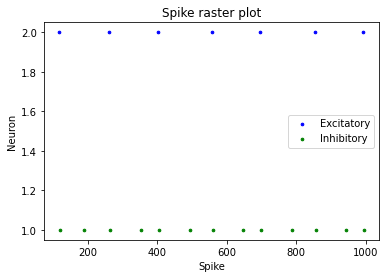

In [276]:
NeuronsG4.RasterPlot()

# part 2

# Neuron Population

In [277]:
def neuronPopulationDef(numExcitatory,numInhibitory,excitatoryConnect, inhibitoryConnect, currentModel1 ,  currentModel2):
  neurons = []
  relation = []
  numNeurons = numExcitatory + numInhibitory   
  temp1 = int(numNeurons * excitatoryConnect)
  temp2 = int(numNeurons * inhibitoryConnect)

  for i in range(numExcitatory):
        
    neuron = LIF(neuronMode = 0 , currentModel = currentModel1)
    neurons.append(neuron)
    relation.append(random.sample(range(numNeurons), temp1))
    
  for i in range(numInhibitory):
    neuron = LIF(neuronMode = 1 , currentModel = currentModel2)
    neurons.append(neuron)
    relation.append(random.sample(range(numNeurons), temp2))
  
  #neuronsPopulation = NeuronsGroup(neurons, relation)
  return neurons , relation

In [279]:
#sin current
neuronsP1 , relationP1 = neuronPopulationDef(8,2,0.2,0.2,3,3)
NeuronsGP1 = NeuronsGroup(neurons=neuronsP1, neuronRelations=relationP1)
NeuronsGP1.groupPotential()

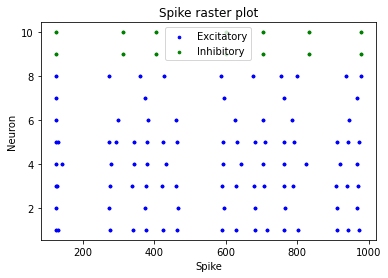

In [129]:
NeuronsGP1.RasterPlot()

# part 3

# Connection between populations

In [293]:
neuronsP1 , relationP1 = neuronPopulationDef(10, 0, 0.2,0, 3,3)
neuronsP2 ,relationP2 = neuronPopulationDef(10, 0, 0.1,0, 4,4)
neuronsP3 ,relationP3 = neuronPopulationDef(0, 10, 0, 0.1, 3,3)

NeuronsGP1 = NeuronsGroup(neurons=neuronsP1, neuronRelations=relationP1)
NeuronsGP2 = NeuronsGroup(neurons=neuronsP2, neuronRelations=relationP2)
NeuronsGP3 = NeuronsGroup(neurons=neuronsP3, neuronRelations=relationP3)

NeuronsGP1.PopulationRelation(NeuronsGP3)
NeuronsGP2.PopulationRelation(NeuronsGP3)


In [294]:

import threading
from multiprocessing import Process
import sys

#run the program

p1 = Process(target = NeuronsGP1.groupPotential())
p1.start()
p2 = Process(target = NeuronsGP2.groupPotential())
p2.start()
p3 = Process(target = NeuronsGP3.groupPotential())
p3.start()


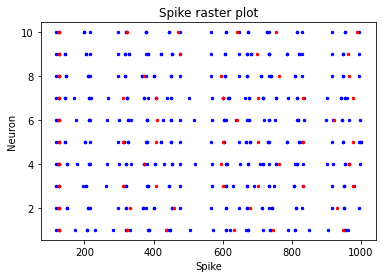

In [295]:
plt.scatter(NeuronsGP1.exctatorySpikesTime, NeuronsGP1.excitatorySpikes, c='blue', s=6)
plt.scatter(NeuronsGP2.exctatorySpikesTime, NeuronsGP2.excitatorySpikes, c='blue', s=6)
plt.scatter(NeuronsGP3.inhibitorySpikesTime, NeuronsGP3.inhibitorySpikes, c='red', s=6)
plt.title('Spike raster plot')
plt.xlabel("Spike")
plt.ylabel("Neuron")
#plt.legend(['Excitatory', 'Inhibitory'])
plt.show()